# Greedy

Thuận toán Greedy:

- 1: Khởi tạo 
- 2: Liệt kê ra tất cả lựa chọn và chọn lựa chọn tốt nhất trong thời điểm hiện tại (Mặc kệ cho tương lai ra sao)
- 3: Di chuyển tới lựa chọn và tiếp tục bước 2 cho đến khi tới được đích hoặc không còn bước nào nữa


### Setting up
install these libraries

In [17]:
!pip install networkx
!pip install matplotlib

### Bài toán Người du lịch

tìm cách để đi qua được tất cả các thành phố/nodes/vị trí.

<b>Greedy: luôn chọn đường đi tiếp theo với chi phí tối thiểu nhất</b>

tất nhiên, với cách làm như vậy sẽ chưa chắc đạt được kết quả tốt nhất.

In [1]:
def tsp_greedy(graph, start):
    visited = set([start])
    path = [start]
    total_cost = 0
    current_node = start

    while len(visited) < len(graph):
        neighbors = graph[current_node]
        next_node = None
        min_cost = float('inf')

        for neighbor, cost in neighbors:
            # pick the least price option at the time
            if neighbor not in visited and cost < min_cost:
                min_cost = cost
                next_node = neighbor

        if next_node is None:
            break  # Dead end (shouldn't happen in a complete graph)
        
        visited.add(next_node)
        path.append(next_node)
        total_cost += min_cost
        current_node = next_node

    # Return to start to complete cycle (if required, uncomment below lines)
    for neighbor, cost in graph[current_node]:
        if neighbor == start:
            total_cost += cost
            path.append(start)
            break

    return total_cost, path

### Visualize code function


In [3]:
import networkx as nx
import matplotlib.pyplot as plt

def visualize_tsp_path(graph, path, cost, title_prefix="Greedy TSP"):
    """
    Visualize a graph and highlight the TSP path.
    
    Parameters:
    - graph: dict, format {node: [(neighbor, weight), ...]}
    - path: list of nodes in the TSP path
    - cost: total cost of the TSP path
    - title_prefix: custom label for the plot title
    """
    # Create NetworkX graph
    G = nx.Graph()
    for node, neighbors in graph.items():
        for neighbor, weight in neighbors:
            G.add_edge(node, neighbor, weight=weight)

    # Position nodes
    pos = nx.spring_layout(G, seed=42)

    # Draw nodes and all edges
    plt.figure(figsize=(10, 7))
    nx.draw(G, pos, with_labels=True, node_color='lightblue',
            node_size=800, font_weight='bold')
    nx.draw_networkx_edge_labels(
        G, pos,
        edge_labels={(u, v): d['weight'] for u, v, d in G.edges(data=True)}
    )

    # Highlight TSP path
    edge_path = list(zip(path, path[1:]))
    nx.draw_networkx_edges(G, pos, edgelist=edge_path,
                           edge_color='red', width=3)

    # Display title and result
    plt.title(
        f"{title_prefix} Path: {' -> '.join(path)}\nTotal Cost: {cost}",
        fontsize=14
    )
    plt.axis('off')
    plt.show()

### Sample 1

Greedy TSP Path: A -> B -> E -> D -> C -> A
Total Cost: 23


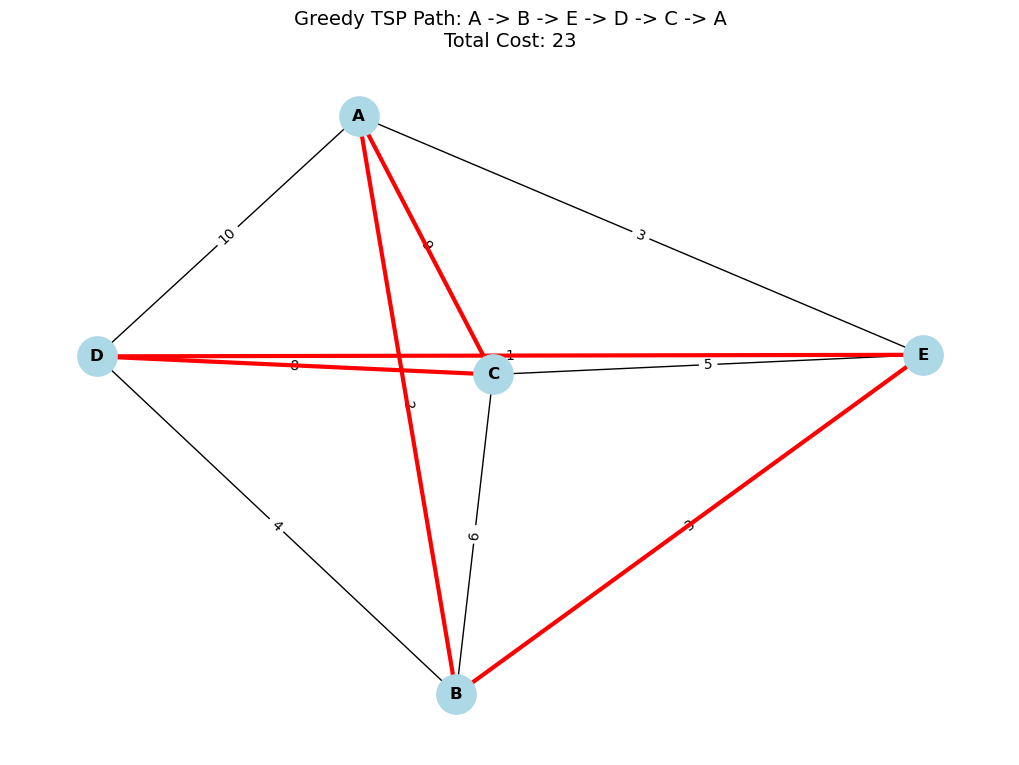

In [4]:
graph = {
    'A': [('B', 2), ('C', 9), ('D', 10), ('E', 3)],
    'B': [('A', 2), ('C', 6), ('D', 4), ('E', 3)],
    'C': [('A', 9), ('B', 6), ('D', 8), ('E', 5)],
    'D': [('A', 10), ('B', 4), ('C', 8), ('E', 1)],
    'E': [('A', 3), ('B', 3), ('C', 5), ('D', 1)],
}

cost, path = tsp_greedy(graph, 'A')
print(f"Greedy TSP Path: {' -> '.join(path)}")
print(f"Total Cost: {cost}")

visualize_tsp_path(graph, path, cost)

### Sample 2

Greedy TSP Path: Arad -> Zerind -> Oradea -> Sibiu -> Rimnicu -> Pitesti -> Bucharest -> Urziceni -> Hirsova -> Eforie
Total Cost: 844


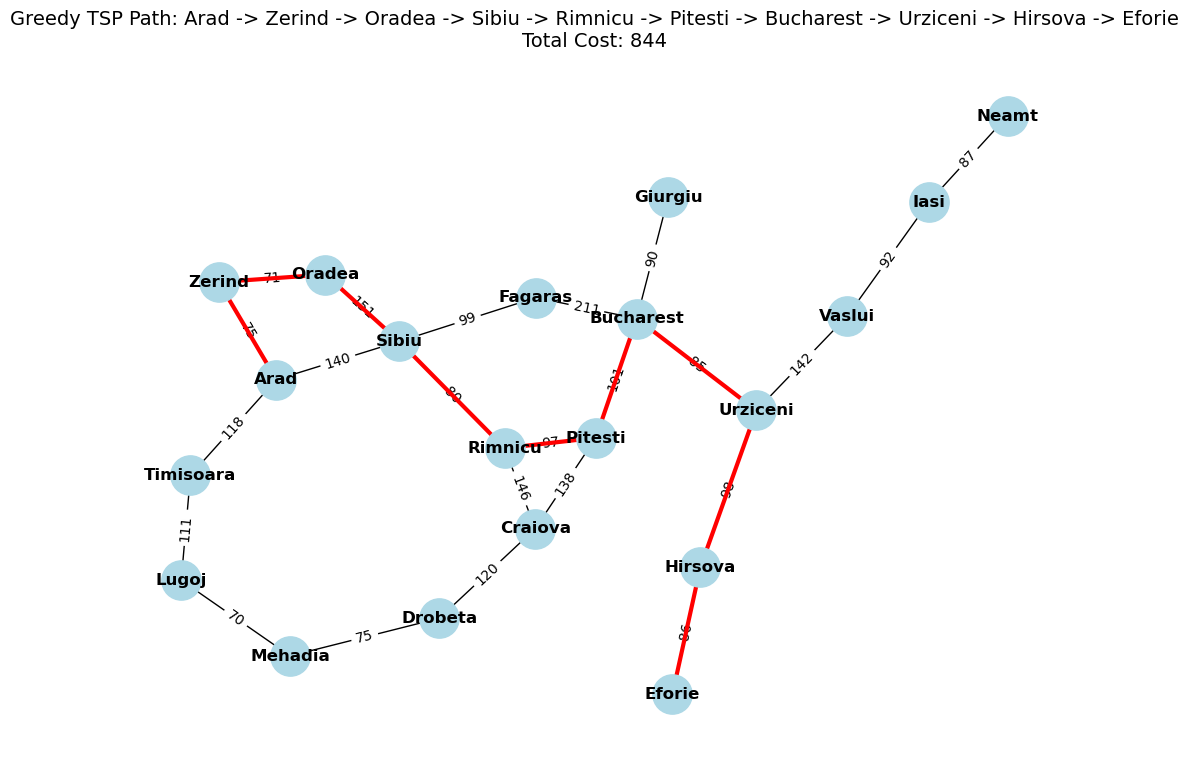

In [20]:
graph = {
    'Arad': [('Sibiu', 140), ('Zerind', 75), ('Timisoara', 118)],
    'Bucharest': [('Fagaras', 211),('Pitesti', 101), ('Giurgiu', 90), ('Urziceni', 85)],
    'Craiova': [('Drobeta', 120), ('Rimnicu', 146), ('Pitesti', 138)],
    'Drobeta': [('Mehadia', 75), ('Craiova', 120)],
    'Eforie': [('Hirsova', 86)],
    'Fagaras': [('Sibiu', 99), ('Bucharest', 211)],
    'Giurgiu': [('Bucharest', 90)],
    'Hirsova': [('Urziceni', 98), ('Eforie', 86)],
    'Iasi': [('Vaslui', 92), ('Neamt', 87)],
    'Lugoj': [('Timisoara', 111), ('Mehadia', 70)],
    'Mehadia': [('Lugoj', 70), ('Drobeta', 75)],
    'Neamt': [('Iasi', 87)],
    'Oradea': [('Zerind', 71), ('Sibiu', 151)],
    'Pitesti': [('Rimnicu', 97), ('Craiova', 138), ('Bucharest', 101)],
    'Rimnicu': [('Sibiu', 80), ('Craiova', 146), ('Pitesti', 97)],
    'Sibiu': [('Arad', 140), ('Oradea', 151), ('Fagaras', 99), ('Rimnicu', 80)],
    'Timisoara': [('Arad', 118), ('Lugoj', 111)],
    'Urziceni': [('Bucharest', 85), ('Vaslui', 142), ('Hirsova', 98)],
    'Vaslui': [('Iasi', 92), ('Urziceni', 142)],
    'Zerind': [('Arad', 75), ('Oradea', 71)]
}

cost, path = tsp_greedy(graph, 'Arad')
print(f"Greedy TSP Path: {' -> '.join(path)}")
print(f"Total Cost: {cost}")

visualize_tsp_path(graph, path, cost)